In [1]:
import numpy as np
import time

import encode

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

In [70]:
def compute_gram(orig_data, norm=False):
    data = np.copy(orig_data)
    if data.ndim == 1:  # If the matrix is a vector
        data = data[..., np.newaxis]  # Transform into a matrix
    n_samples = data.shape[0]
    gram_mat = np.zeros((n_samples, n_samples))
    if norm:
        for i in range(n_samples):
            data[i, :] = data[i, :] - np.mean(data[i, :])
            data[i, :] = data[i, :] / (np.linalg.norm(data[i, :]) + 1e-5)
    for i in range(n_samples):
        for j in range(n_samples):
            gram_mat[i, j] = data[i, :] @ data[j, :].T
    return gram_mat

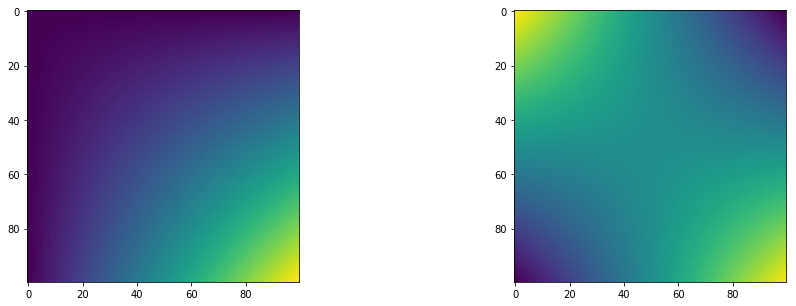

In [128]:
x = np.arange(-0.5, 0.5, 1e-2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.imshow(compute_gram(x+0.5), cmap='viridis')
ax2.imshow(compute_gram(x), cmap='viridis');

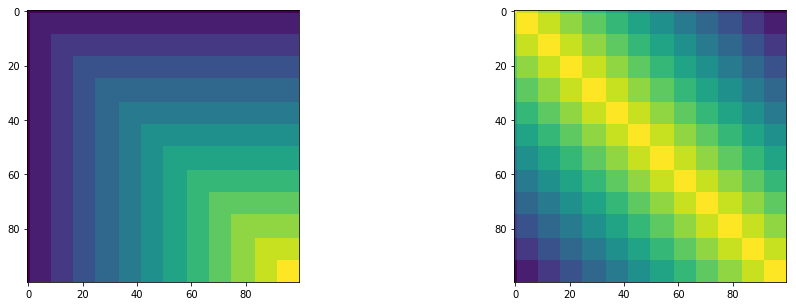

In [287]:
y = encode.naive_binary(x, binary_dim=12)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.imshow(compute_gram(y), cmap='viridis')
ax2.imshow(compute_gram(y-0.5), cmap='viridis');

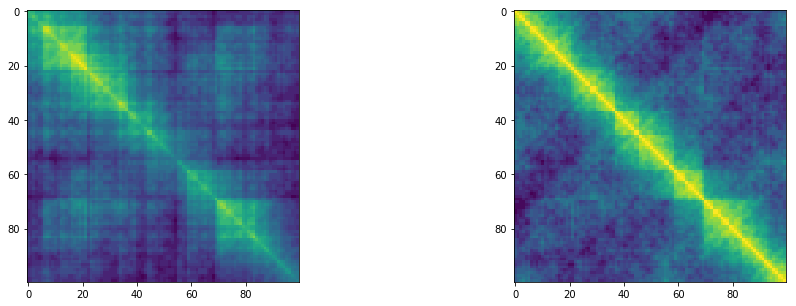

In [149]:
y = encode.local_binary(x, binary_dim=50)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.imshow(compute_gram(y), cmap='viridis')
ax2.imshow(compute_gram(y-0.5), cmap='viridis');

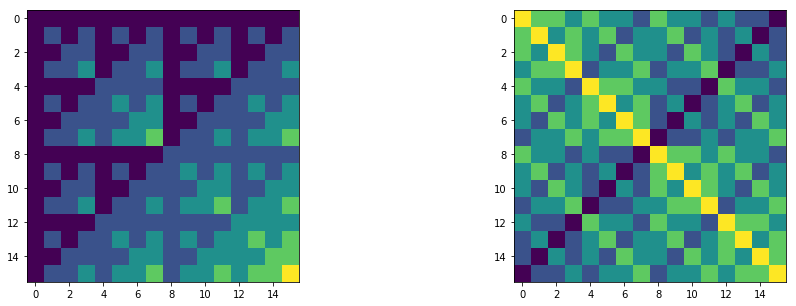

In [159]:
x = np.arange(-0.5, 0.5, 2**(-4))
y = encode.bit_encoding(x, binary_dim=4)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.imshow(compute_gram(y), cmap='viridis')
ax2.imshow(compute_gram(y-0.5), cmap='viridis');

In [166]:
z = compute_gram(y-0.5)
print((z + 1)*2)

[[4. 3. 3. 2. 3. 2. 2. 1. 3. 2. 2. 1. 2. 1. 1. 0.]
 [3. 4. 2. 3. 2. 3. 1. 2. 2. 3. 1. 2. 1. 2. 0. 1.]
 [3. 2. 4. 3. 2. 1. 3. 2. 2. 1. 3. 2. 1. 0. 2. 1.]
 [2. 3. 3. 4. 1. 2. 2. 3. 1. 2. 2. 3. 0. 1. 1. 2.]
 [3. 2. 2. 1. 4. 3. 3. 2. 2. 1. 1. 0. 3. 2. 2. 1.]
 [2. 3. 1. 2. 3. 4. 2. 3. 1. 2. 0. 1. 2. 3. 1. 2.]
 [2. 1. 3. 2. 3. 2. 4. 3. 1. 0. 2. 1. 2. 1. 3. 2.]
 [1. 2. 2. 3. 2. 3. 3. 4. 0. 1. 1. 2. 1. 2. 2. 3.]
 [3. 2. 2. 1. 2. 1. 1. 0. 4. 3. 3. 2. 3. 2. 2. 1.]
 [2. 3. 1. 2. 1. 2. 0. 1. 3. 4. 2. 3. 2. 3. 1. 2.]
 [2. 1. 3. 2. 1. 0. 2. 1. 3. 2. 4. 3. 2. 1. 3. 2.]
 [1. 2. 2. 3. 0. 1. 1. 2. 2. 3. 3. 4. 1. 2. 2. 3.]
 [2. 1. 1. 0. 3. 2. 2. 1. 3. 2. 2. 1. 4. 3. 3. 2.]
 [1. 2. 0. 1. 2. 3. 1. 2. 2. 3. 1. 2. 3. 4. 2. 3.]
 [1. 0. 2. 1. 2. 1. 3. 2. 2. 1. 3. 2. 3. 2. 4. 3.]
 [0. 1. 1. 2. 1. 2. 2. 3. 1. 2. 2. 3. 2. 3. 3. 4.]]


In [177]:
Z = (z+1)*2
diag_sum = np.zeros((16, ))
for i_diag in range(16):
    for i_cell in range(i_diag+1):
        diag_sum[i_diag] += Z[15-i_diag+i_cell, i_cell]
    diag_sum[i_diag] /= (i_diag+1)
print(diag_sum)

[0.         1.         0.66666667 2.         0.8        1.66666667
 1.42857143 3.         1.33333333 1.8        1.27272727 2.66666667
 1.53846154 2.42857143 2.26666667 4.        ]


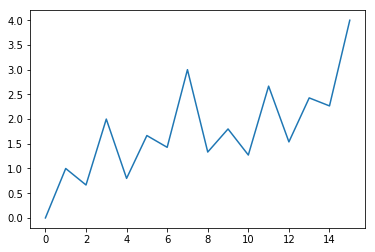

In [179]:
plt.plot(diag_sum)

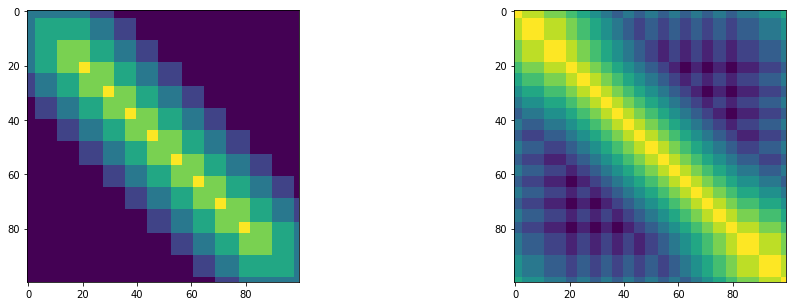

In [374]:
x = np.arange(-0.5, 0.5, 1e-2)
y = encode.large_bin_binary(x, binary_dim=12, balanced=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.imshow(compute_gram(y), cmap='viridis')
ax2.imshow(compute_gram(y-0.5), cmap='viridis');

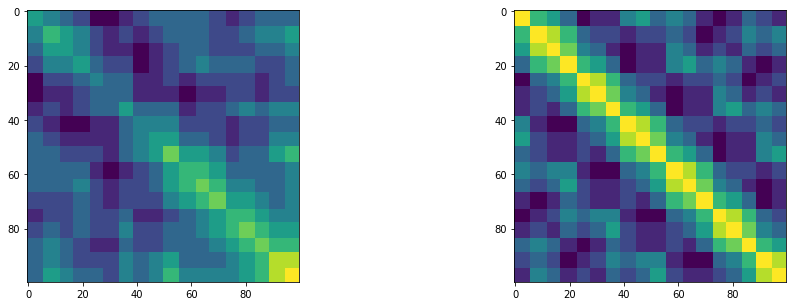

In [347]:
x = np.arange(-0.5, 0.5, 1e-2)
y = encode.fixed_binary(x, binary_dim=12)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.imshow(compute_gram(y), cmap='viridis')
ax2.imshow(compute_gram(y-0.5), cmap='viridis');

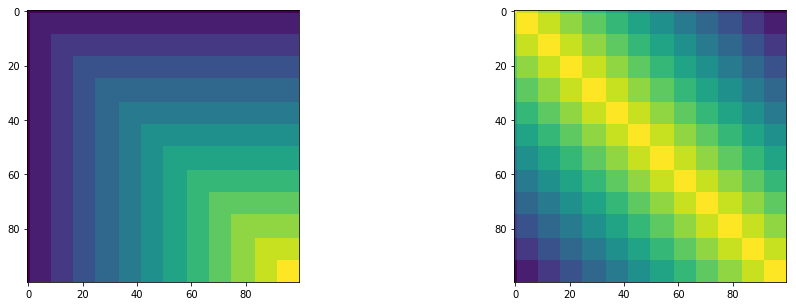

In [371]:
y = encode.naive_binary(x, binary_dim=12)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.imshow(compute_gram(y), cmap='viridis')
ax2.imshow(compute_gram(y-0.5), cmap='viridis');